In [0]:
# File location and type
file_location = "/FileStore/tables/tips.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# Read the tips json into a spark dataframe
tipDataFrame = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

year,count
2009,3
2010,89
2011,218
2012,291
2013,211
2014,275
2015,260
2016,291
2017,251
2018,382


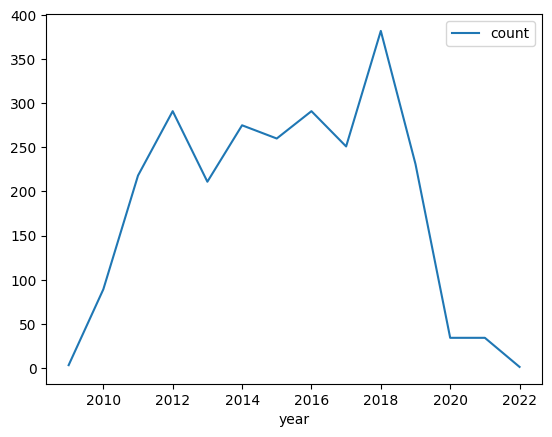

In [0]:
#Filter the tipDataFrame by specific business id 
from pyspark.sql import functions as F
business_spec_tips = tipDataFrame.select('business_id', 'compliment_count', 'date', 'text', 'user_id').filter(F.col('business_id')== 'FEXhWNCMkv22qG04E83Qjg')

#Count the number of tips per year and sort by year
tip_trend_over_years = business_spec_tips.groupby(F.year('date').alias('year')).count().orderBy('year', ascending=True).toPandas()

#Plot tip trend over the years
tip_trend_over_years.plot(x='year', y ='count')
display(tip_trend_over_years)